In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
print("Please upload the 'Housing.csv' file.")
uploaded = files.upload()

df = pd.read_csv('Housing.csv')
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Please upload the 'Housing.csv' file.


Saving Housing.csv to Housing.csv

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.cor

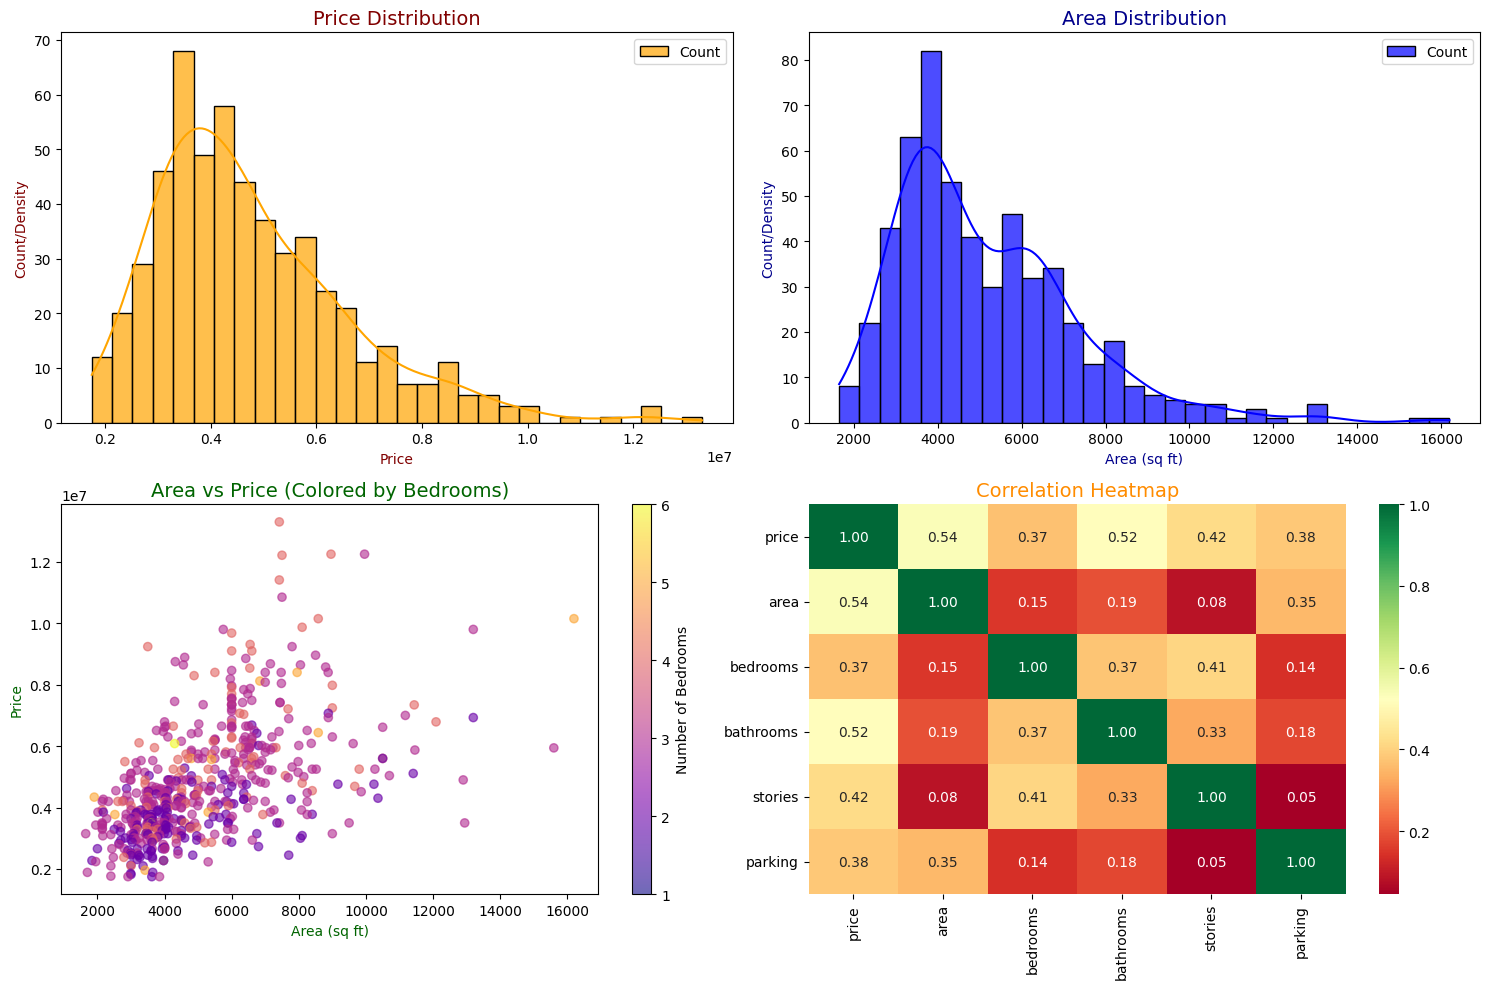

In [10]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='price', bins=30, color='orange', alpha=0.7, stat='count', label='Count', kde=True)
plt.title('Price Distribution', color='maroon', fontsize=14)
plt.xlabel('Price', color='maroon')
plt.ylabel('Count/Density', color='maroon')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='area', bins=30, color='blue', alpha=0.7, stat='count', label='Count', kde=True)
plt.title('Area Distribution', color='darkblue', fontsize=14)
plt.xlabel('Area (sq ft)', color='darkblue')
plt.ylabel('Count/Density', color='darkblue')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(df['area'], df['price'], c=df['bedrooms'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Number of Bedrooms')
plt.title('Area vs Price (Colored by Bedrooms)', color='darkgreen', fontsize=14)
plt.xlabel('Area (sq ft)', color='darkgreen')
plt.ylabel('Price', color='darkgreen')

plt.subplot(2, 2, 4)
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Heatmap', color='darkorange', fontsize=14)

plt.tight_layout()
plt.show()

In [5]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
            'furnishingstatus']
X = df[features]
y = df['price']

X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                               'airconditioning', 'furnishingstatus', 'prefarea'],
                   drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nLinear Regression Cross-Validation R2 Scores:", lr_cv_scores)
print("Average CV R2 Score:", lr_cv_scores.mean())

dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nDecision Tree Cross-Validation R2 Scores:", dt_cv_scores)
print("Average CV R2 Score:", dt_cv_scores.mean())

dt_param_grid = {'max_depth': [3, 5, 7, 10]}
best_score = -np.inf
best_depth = 3
for depth in dt_param_grid['max_depth']:
    dt_temp = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_temp, X_train_scaled, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth
print(f"\nBest max_depth for Decision Tree: {best_depth} with R2: {best_score}")

dt_model_optimized = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
dt_model_optimized.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_dt = dt_model_optimized.predict(X_test_scaled)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("\nModel Evaluation:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R2 Score: {lr_r2:.2f}")
print(f"Decision Tree - MSE: {dt_mse:.2f}, R2 Score: {dt_r2:.2f}")


Linear Regression Cross-Validation R2 Scores: [0.69856012 0.68386251 0.60963463 0.61909486 0.62404878]
Average CV R2 Score: 0.6470401792343208

Decision Tree Cross-Validation R2 Scores: [-0.10337778  0.22552454  0.05484797  0.32272077  0.17932396]
Average CV R2 Score: 0.13580789240333693

Best max_depth for Decision Tree: 3 with R2: 0.4104329828083017

Model Evaluation:
Linear Regression - MSE: 1754318687330.67, R2 Score: 0.65
Decision Tree - MSE: 3152798618642.12, R2 Score: 0.38


In [6]:
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nDecision Tree Cross-Validation R2 Scores:", dt_cv_scores)
print("Average CV R2 Score:", dt_cv_scores.mean())

# Optimize Decision Tree with max_depth
dt_param_grid = {'max_depth': [3, 5, 7, 10]}
best_score = -np.inf
best_depth = 3
for depth in dt_param_grid['max_depth']:
    dt_temp = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_temp, X_train_scaled, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth
print(f"\nBest max_depth for Decision Tree: {best_depth} with R2: {best_score}")

# Retrain Decision Tree with best parameter
dt_model_optimized = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
dt_model_optimized.fit(X_train_scaled, y_train)

# Task 6: Compare and Evaluate Models
# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_dt = dt_model_optimized.predict(X_test_scaled)

# Metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("\nModel Evaluation:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R2 Score: {lr_r2:.2f}")
print(f"Decision Tree - MSE: {dt_mse:.2f}, R2 Score: {dt_r2:.2f}")


Decision Tree Cross-Validation R2 Scores: [-0.10337778  0.22552454  0.05484797  0.32272077  0.17932396]
Average CV R2 Score: 0.13580789240333693

Best max_depth for Decision Tree: 3 with R2: 0.4104329828083017

Model Evaluation:
Linear Regression - MSE: 1754318687330.67, R2 Score: 0.65
Decision Tree - MSE: 3152798618642.12, R2 Score: 0.38


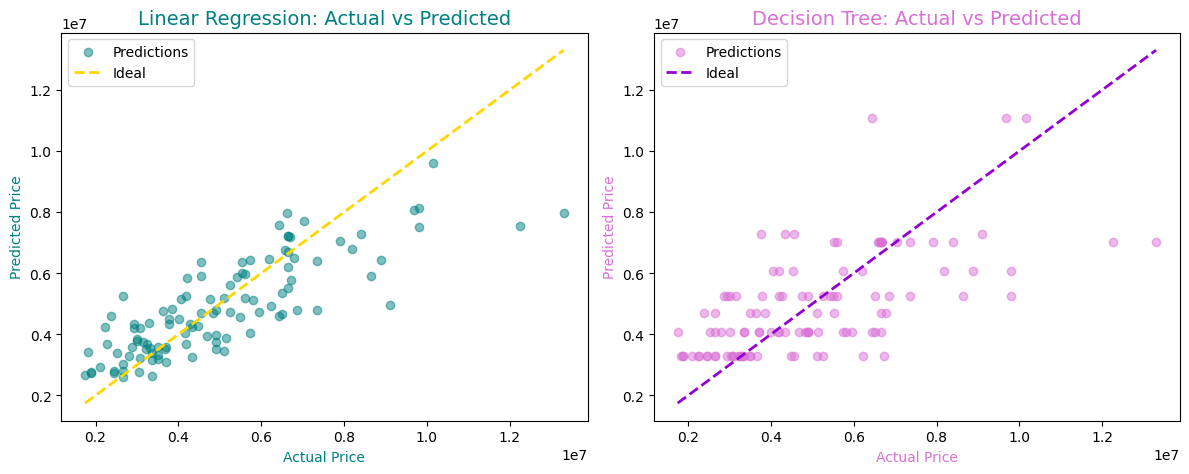

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='teal', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'gold', lw=2, linestyle='--', label='Ideal')
plt.title('Linear Regression: Actual vs Predicted', color='teal', fontsize=14)
plt.xlabel('Actual Price', color='teal')
plt.ylabel('Predicted Price', color='teal')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='orchid', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'darkviolet', lw=2, linestyle='--', label='Ideal')
plt.title('Decision Tree: Actual vs Predicted', color='orchid', fontsize=14)
plt.xlabel('Actual Price', color='orchid')
plt.ylabel('Predicted Price', color='orchid')
plt.legend()

plt.tight_layout()
plt.show()